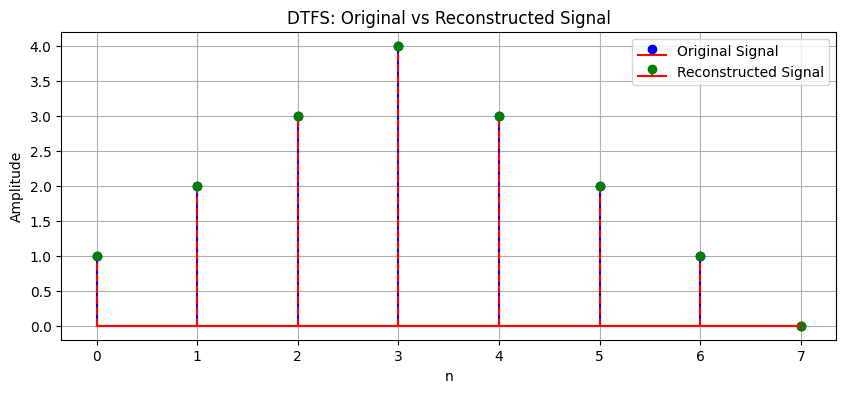

DTFS Coefficients:
C[0] = 2.0000+0.0000j
C[1] = -0.6036-0.6036j
C[2] = 0.0000+0.0000j
C[3] = 0.1036-0.1036j
C[4] = 0.0000+0.0000j
C[5] = 0.1036+0.1036j
C[6] = 0.0000+0.0000j
C[7] = -0.6036+0.6036j


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define a periodic discrete signal
N = 8  # Period of the signal
n = np.arange(N)
x_n = np.array([1, 2, 3, 4, 3, 2, 1, 0])  # Example discrete signal

# Compute DTFS coefficients
C_k = np.fft.fft(x_n) / N  # Normalized Discrete Fourier Transform

# Reconstruct the signal using DTFS
x_reconstructed = np.zeros(N, dtype=complex)
for k in range(N):
    x_reconstructed += C_k[k] * np.exp(1j * 2 * np.pi * k * n / N)

# Plot original and reconstructed signals
plt.figure(figsize=(10, 4))
plt.stem(n, x_n, linefmt='b-', markerfmt='bo', basefmt='r-', label='Original Signal')
plt.stem(n, np.real(x_reconstructed), linefmt='r--', markerfmt='go', basefmt='r-', label='Reconstructed Signal')
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.title("DTFS: Original vs Reconstructed Signal")
plt.legend()
plt.grid()
plt.show()

# Print DTFS Coefficients
print("DTFS Coefficients:")
for k in range(N):
    print(f"C[{k}] = {C_k[k]:.4f}")

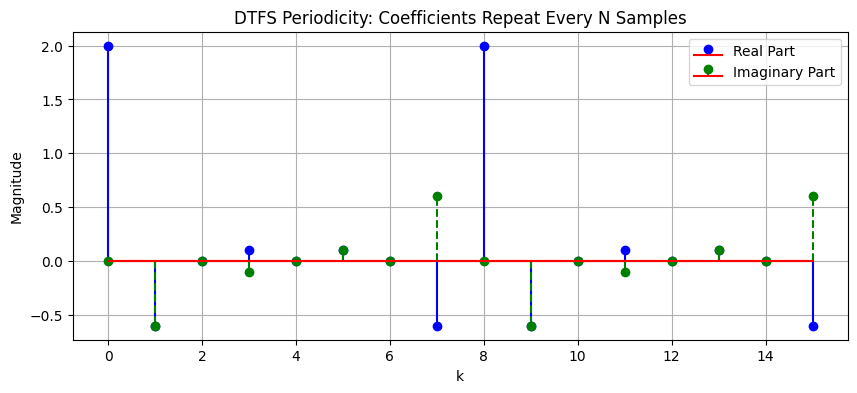

DTFS Coefficients (showing periodicity):
C[0] = 2.0000+0.0000j
C[1] = -0.6036-0.6036j
C[2] = 0.0000+0.0000j
C[3] = 0.1036-0.1036j
C[4] = 0.0000+0.0000j
C[5] = 0.1036+0.1036j
C[6] = 0.0000+0.0000j
C[7] = -0.6036+0.6036j
C[8] = 2.0000+0.0000j
C[9] = -0.6036-0.6036j
C[10] = 0.0000+0.0000j
C[11] = 0.1036-0.1036j
C[12] = 0.0000+0.0000j
C[13] = 0.1036+0.1036j
C[14] = 0.0000+0.0000j
C[15] = -0.6036+0.6036j


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a periodic discrete signal
N = 8  # Period of the signal
n = np.arange(N)
x_n = np.array([1, 2, 3, 4, 3, 2, 1, 0])  # Example discrete signal

# Compute DTFS coefficients
C_k = np.fft.fft(x_n) / N  # Normalized Discrete Fourier Transform

# Verify periodicity property: C[k] repeats every N
C_k_extended = np.tile(C_k, 2)  # Extend coefficients to see repetition
k_extended = np.arange(2 * N)

# Plot DTFS coefficients and their periodic repetition
plt.figure(figsize=(10, 4))
plt.stem(
    k_extended,
    np.real(C_k_extended),
    linefmt="b-",
    markerfmt="bo",
    basefmt="r-",
    label="Real Part",
)
plt.stem(
    k_extended,
    np.imag(C_k_extended),
    linefmt="g--",
    markerfmt="go",
    basefmt="r-",
    label="Imaginary Part",
)
plt.xlabel("n")
plt.ylabel("Magnitude")
plt.title("DTFS Periodicity: Coefficients Repeat Every N Samples")
plt.legend()
plt.grid()
plt.show()

# Print DTFS Coefficients to observe periodicity
print("DTFS Coefficients (showing periodicity):")
for k in range(2 * N):
    print(f"C[{k}] = {C_k_extended[k]:.4f}")

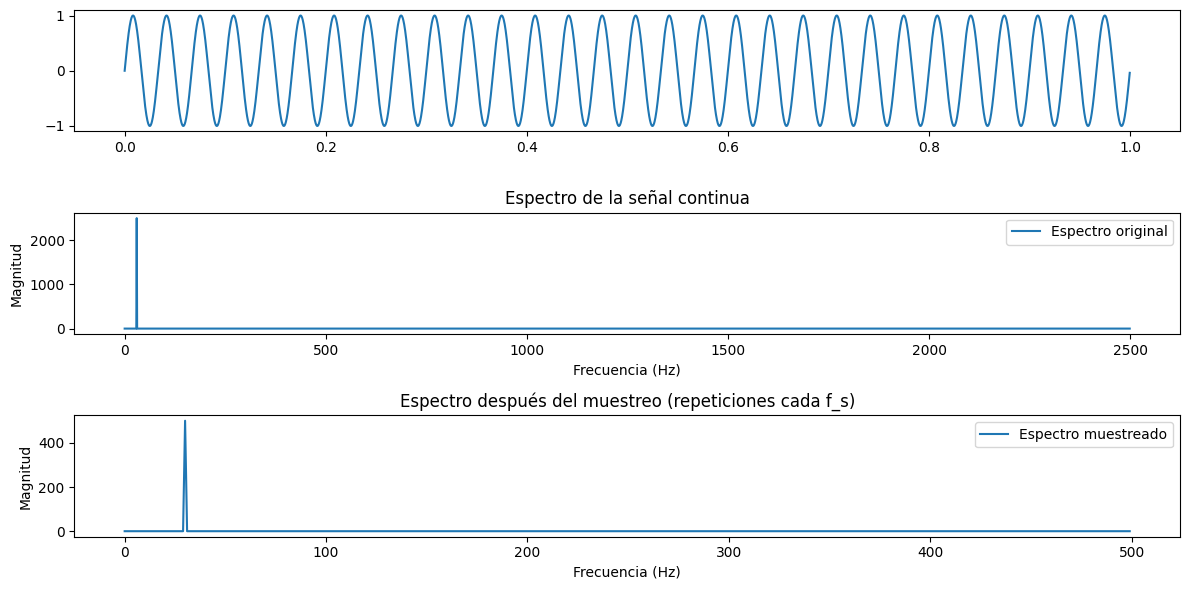

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs_cont = 5000  # Frecuencia de muestreo "continua" (muy alta)
fs_sampled = 1000  # Frecuencia de muestreo baja
T = 1  # Duración de la señal en segundos
f_signal = 30  # Frecuencia de la señal

# Señal continua
t_cont = np.linspace(0, T, fs_cont * T, endpoint=False)
signal_cont = np.sin(2 * np.pi * f_signal * t_cont)

# Señal muestreada
t_sampled = np.linspace(0, T, fs_sampled * T, endpoint=False)
signal_sampled = np.sin(2 * np.pi * f_signal * t_sampled)

# FFT continua
fft_cont = np.fft.fft(signal_cont)
freqs_cont = np.fft.fftfreq(len(signal_cont), d=1 / fs_cont)

# FFT muestreada
fft_sampled = np.fft.fft(signal_sampled)
freqs_sampled = np.fft.fftfreq(len(signal_sampled), d=1 / fs_sampled)

# Graficar espectro original y espectro muestreado
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(
    t_cont, signal_cont
)
plt.subplot(3, 1, 2)
plt.plot(
    freqs_cont[: len(freqs_cont) // 2],
    np.abs(fft_cont[: len(freqs_cont) // 2]),
    label="Espectro original",
)
plt.title("Espectro de la señal continua")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(
    freqs_sampled[: len(freqs_sampled) // 2],
    np.abs(fft_sampled[: len(freqs_sampled) // 2]),
    label="Espectro muestreado",
)
plt.title("Espectro después del muestreo (repeticiones cada f_s)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()

plt.tight_layout()
plt.show()

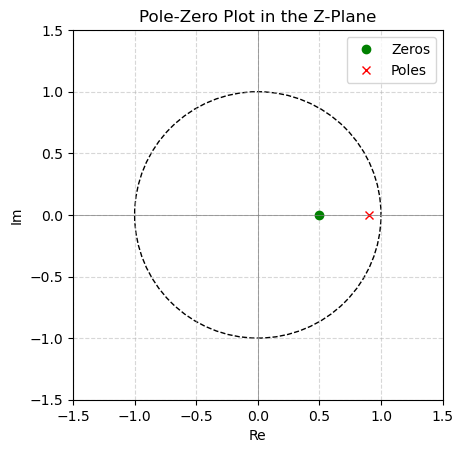

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2zpk

# Define numerator (zeros) and denominator (poles) coefficients of the transfer function
# Example: H(z) = (1 - 0.5z^-1) / (1 - 0.9z^-1)
b = [1, -0.5]  # Numerator coefficients (zeros)
a = [1, -0.9]  # Denominator coefficients (poles)

# Get zeros, poles, and gain
z, p, k = tf2zpk(b, a)

# Plot settings
fig, ax = plt.subplots()
ax.set_title("Pole-Zero Plot in the Z-Plane")

# Draw unit circle
unit_circle = plt.Circle((0, 0), 1, color="black", fill=False, linestyle="dashed")
ax.add_artist(unit_circle)

# Plot zeros and poles
ax.plot(np.real(z), np.imag(z), "go", label="Zeros")  # green circles
ax.plot(np.real(p), np.imag(p), "rx", label="Poles")  # red Xs

# Axes and formatting
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.axhline(0, color="gray", linewidth=0.5)
ax.axvline(0, color="gray", linewidth=0.5)
ax.set_aspect("equal")
ax.grid(True, linestyle="--", alpha=0.5)
ax.legend()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

plt.show()

In [2]:
def zpk_to_latex(z, p, k):
    def format_factor(value):
        sign = "+" if np.real(value) < 0 else "-"
        return f"(z {sign} {abs(np.real(value)):.2f})"

    num = " ".join([format_factor(zero) for zero in z]) if len(z) > 0 else "1"
    den = " ".join([format_factor(pole) for pole in p]) if len(p) > 0 else "1"

    latex_str = r"H(z) = " + f"{k:.2f} \\cdot \\frac{{{num}}}{{{den}}}"
    return latex_str

In [3]:
zpk_to_latex(z,p,k)

'H(z) = 1.00 \\cdot \\frac{(z - 0.50)}{(z - 0.90)}'